# Uber

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from sklearn.preprocessing import OneHotEncoder

## Import dataset

In [2]:
path = "C:/Users/julia/Downloads/uber.csv"
uber = pd.read_csv(path)
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


## Organzie the dataset

In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [4]:
# check the missing data and the percentage

uber.isnull().sum() / uber.shape[0] *100

pickup_dt     0.000000
borough      10.456685
pickups       0.000000
spd           0.000000
vsb           0.000000
temp          0.000000
dewp          0.000000
slp           0.000000
pcp01         0.000000
pcp06         0.000000
pcp24         0.000000
sd            0.000000
hday          0.000000
dtype: float64

In [5]:
uber.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [6]:
# for the missing data we decide to delete that
uber1 = uber.copy()
uber1 = uber1.dropna(axis= 0)
uber1 = uber1.reset_index(drop = True)

In [7]:
# tranform the date object to time type
uber1['pickup_dt'] = pd.to_datetime(uber1['pickup_dt'])
uber1['year'] = uber1['pickup_dt'].dt.year
uber1['month'] = uber1['pickup_dt'].dt.month
uber1['number_week'] = uber1['pickup_dt'].dt.dayofweek
uber1['time'] = uber1['pickup_dt'].dt.time
uber1 = uber1.drop(columns = 'pickup_dt')

In [8]:
uber1.year.value_counts()
# delete the year thus information
uber1 = uber1.drop(columns = 'year')

## Visuallize the data

### Visualzie the pickups vs pickup_dt

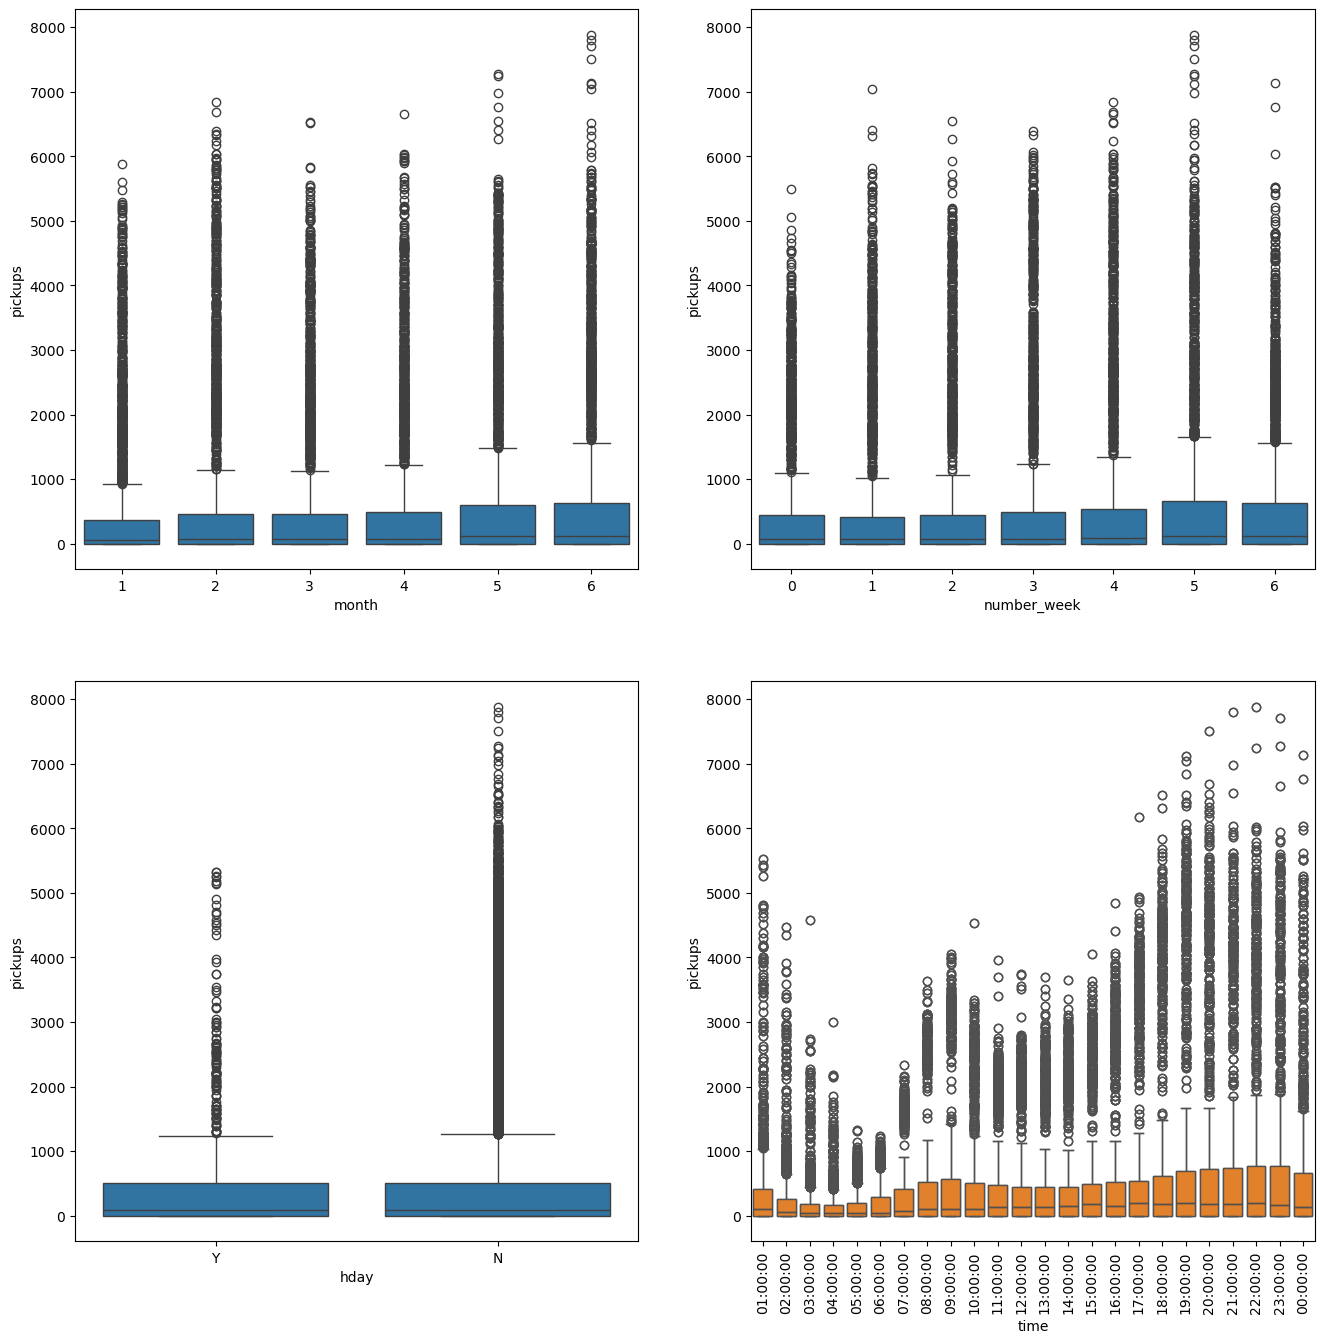

In [9]:
# check all the time related to pickups
time_columns = ['month', 'number_week', 'hday', 'time']
fig, axes = plt.subplots(2,2, figsize = (16,16))
axes = np.ravel(axes)
for i, j in enumerate(time_columns):
  sns.boxplot(data = uber1, x= j, y = 'pickups', ax = axes[i]) 
sns.boxplot(data = uber1, x = 'time', y = 'pickups', ax = axes[3])
plt.xticks(rotation = 90)
plt.show()

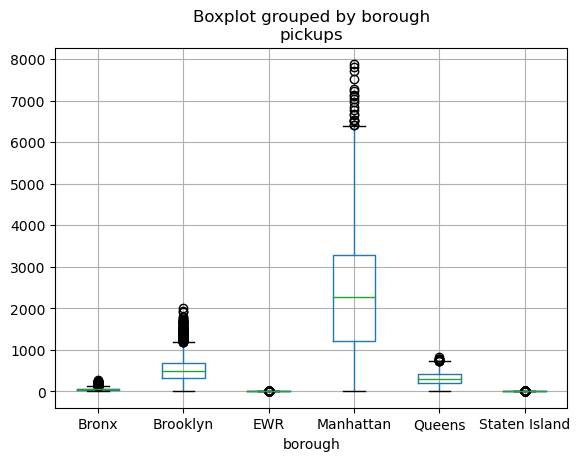

In [10]:
# check the borough vs pickup
uber1.boxplot(column= 'pickups', by = 'borough')
plt.show()

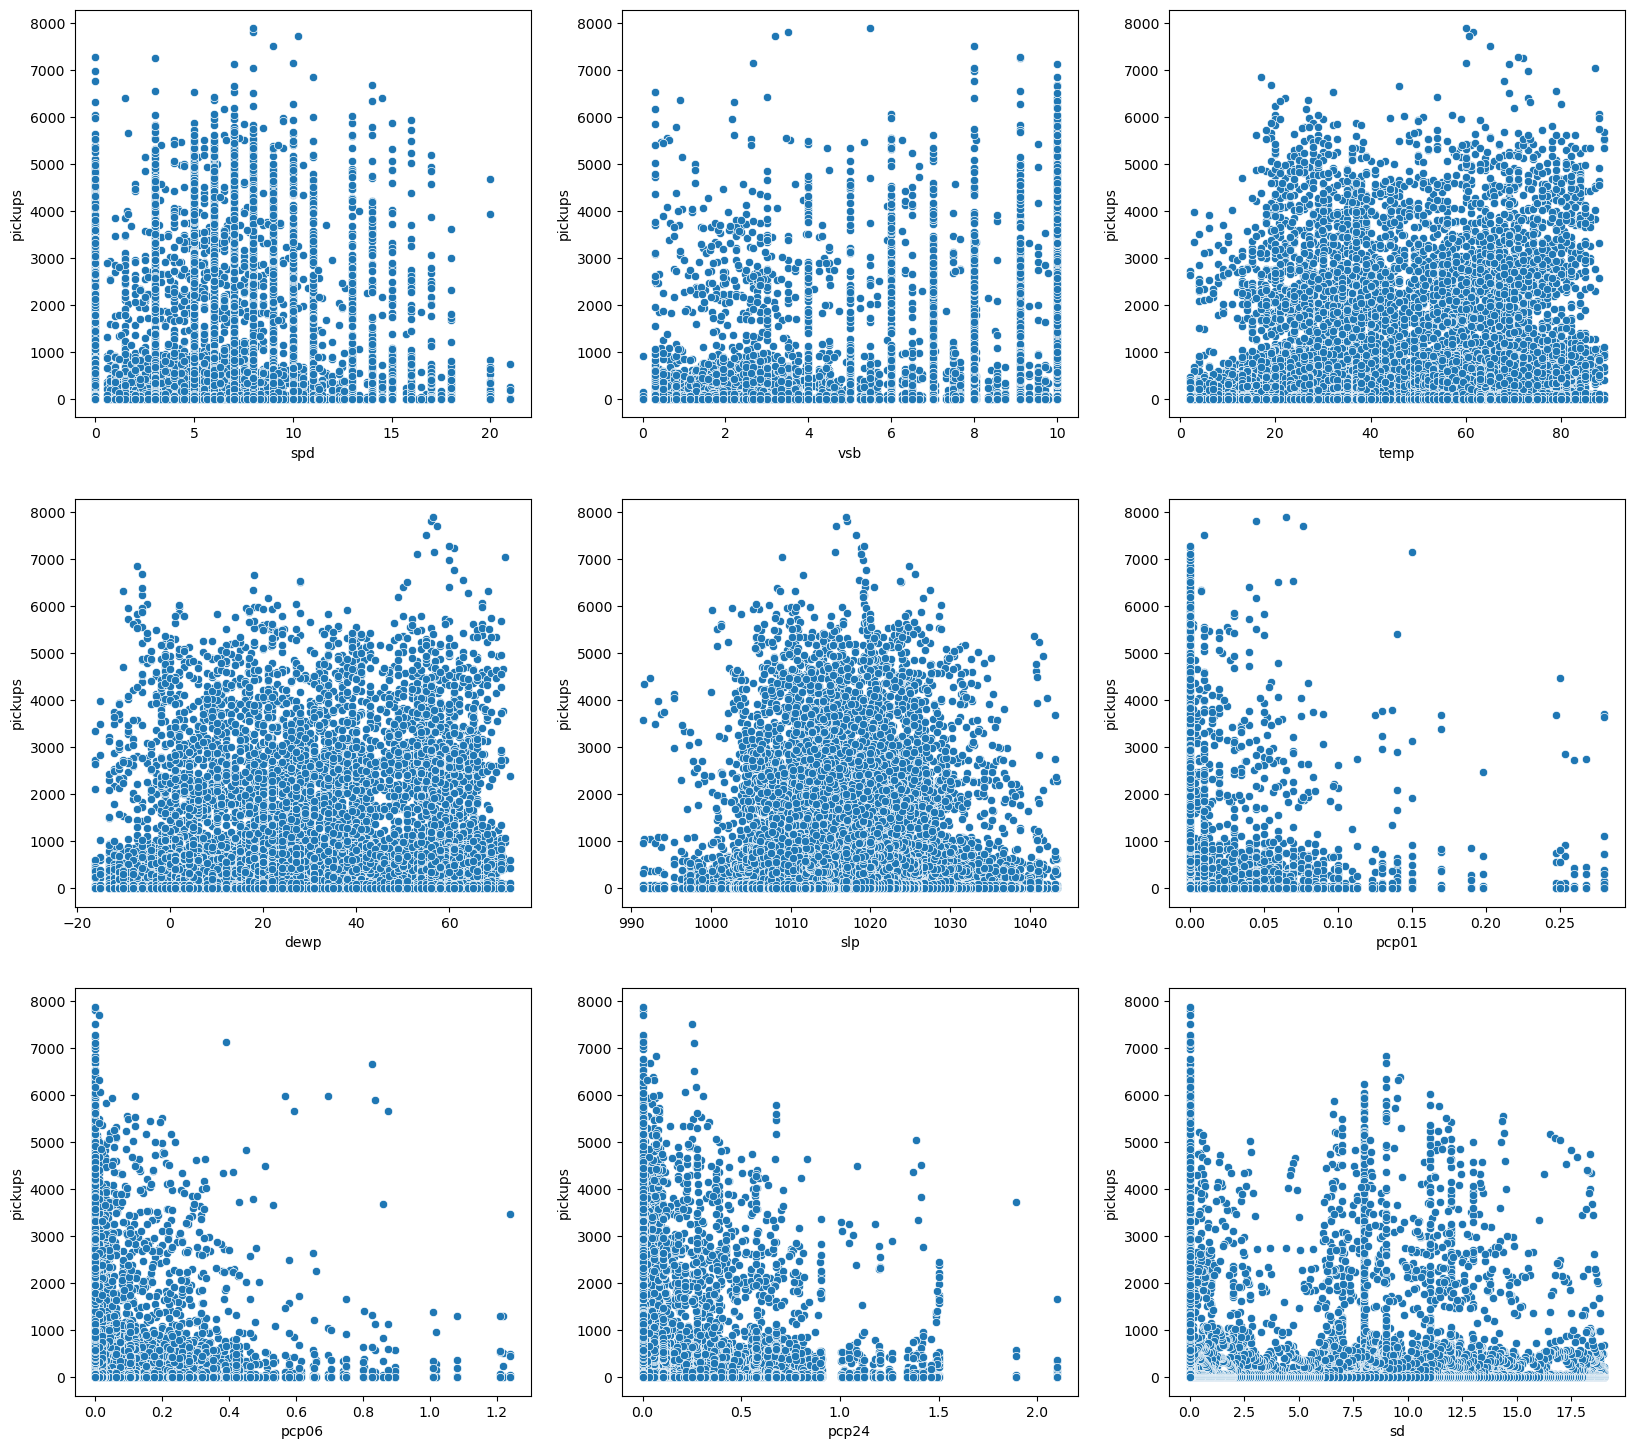

In [11]:
# check the weather influence on pickups
weather_col = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
fig, axes = plt.subplots(3, 3, figsize = (20,18))
axes = np.ravel(axes)
for i, j in enumerate(weather_col):
  sns.scatterplot(data = uber1, x = j, y = 'pickups', ax = axes[i])
plt.show()

the most influence factor is borough, time, pcp01, pcp06

In [12]:
# change the categorical type to numerical type
onehot = OneHotEncoder(drop = 'first', sparse_output= False, dtype = 'int')
object_name = uber1.select_dtypes('object').columns
uber1_one = onehot.fit_transform(uber1[object_name])
onehot_faturename = onehot.get_feature_names_out()
uber1_one = pd.DataFrame(data = uber1_one, columns= onehot_faturename)
# add the uber1_one on uber1 


In [13]:
# drop the categrory type 
uber2 = uber1.copy()
uber2.drop(columns = object_name, inplace = True)
uber2 = uber2.reset_index(drop = True)
# concat the numerical and the data after onehotlabel
uber1_one = uber1_one.reset_index(drop = True)
uber3 = pd.concat([uber2, uber1_one], axis = 1, ignore_index= False)

In [14]:

uber3

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,...,time_14:00:00,time_15:00:00,time_16:00:00,time_17:00:00,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00
0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,990,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
26054,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
26055,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
26056,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# check correlation with pickups
cor = uber3.corr()['pickups']
cor

pickups                  1.000000
spd                      0.009741
vsb                     -0.008429
temp                     0.063692
dewp                     0.040082
slp                     -0.015708
pcp01                    0.005007
pcp06                   -0.002821
pcp24                   -0.022935
sd                      -0.009676
month                    0.058456
number_week              0.042521
borough_Brooklyn        -0.005515
borough_EWR             -0.235917
borough_Manhattan        0.793306
borough_Queens          -0.102553
borough_Staten Island   -0.235237
hday_Y                  -0.011248
time_01:00:00           -0.018967
time_02:00:00           -0.050900
time_03:00:00           -0.070422
time_04:00:00           -0.077891
time_05:00:00           -0.077765
time_06:00:00           -0.067268
time_07:00:00           -0.043429
time_08:00:00           -0.012772
time_09:00:00            0.002460
time_10:00:00           -0.008072
time_11:00:00           -0.015673
time_12:00:00 

In [29]:
cond1 = cor > 0.1 
cond2 = cor < 1
cond3 = cor < -0.1
cond = (cond1 & cond2) | cond3
# find the feature correlation vs pickups which is bigger than 0.1 or less than -0.1
cor[cond].index

Index(['borough_EWR', 'borough_Manhattan', 'borough_Queens',
       'borough_Staten Island'],
      dtype='object')

In [30]:
# find different time and borough vs pickups
uber1.pivot_table(values = 'pickups', index = 'borough', columns = 'time')

time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
borough,,,,,,,,,,,,,,,,,,,,,
Bronx,56.255556,41.657459,30.944751,22.961326,21.646409,20.237569,26.027624,42.116022,62.248619,56.403315,...,53.099448,60.392265,62.795580,67.193370,69.580110,66.718232,63.082873,67.613260,71.408840,65.220994
Brooklyn,736.172222,562.546961,390.867403,266.563536,215.359116,216.651934,285.016575,402.022099,501.243094,558.707182,...,483.071823,508.988950,521.607735,563.093923,665.187845,755.397790,775.607735,780.370166,815.712707,833.585635
EWR,0.000000,0.005525,0.000000,0.000000,0.005525,0.033149,0.038674,0.055249,0.038674,0.016575,...,0.044199,0.066298,0.049724,0.055249,0.027624,0.005525,0.016575,0.000000,0.000000,0.000000
Manhattan,2735.616667,1852.243094,1200.093923,798.895028,636.530387,612.983425,773.845304,1310.049724,2023.082873,2433.883978,...,2232.839779,2477.259669,2792.176796,3409.082873,3985.209945,4344.121547,4110.558011,3869.972376,3758.707182,3534.005525
Queens,395.555556,259.640884,141.563536,92.629834,84.607735,111.823204,190.071823,231.563536,313.640884,306.110497,...,309.215470,367.580110,398.049724,387.839779,425.386740,427.806630,448.110497,453.618785,478.580110,464.116022
Staten Island,1.000000,1.187845,0.795580,0.574586,0.585635,0.756906,0.773481,1.419890,1.895028,1.640884,...,1.994475,2.386740,2.353591,2.265193,2.403315,2.281768,2.149171,1.961326,1.756906,1.613260


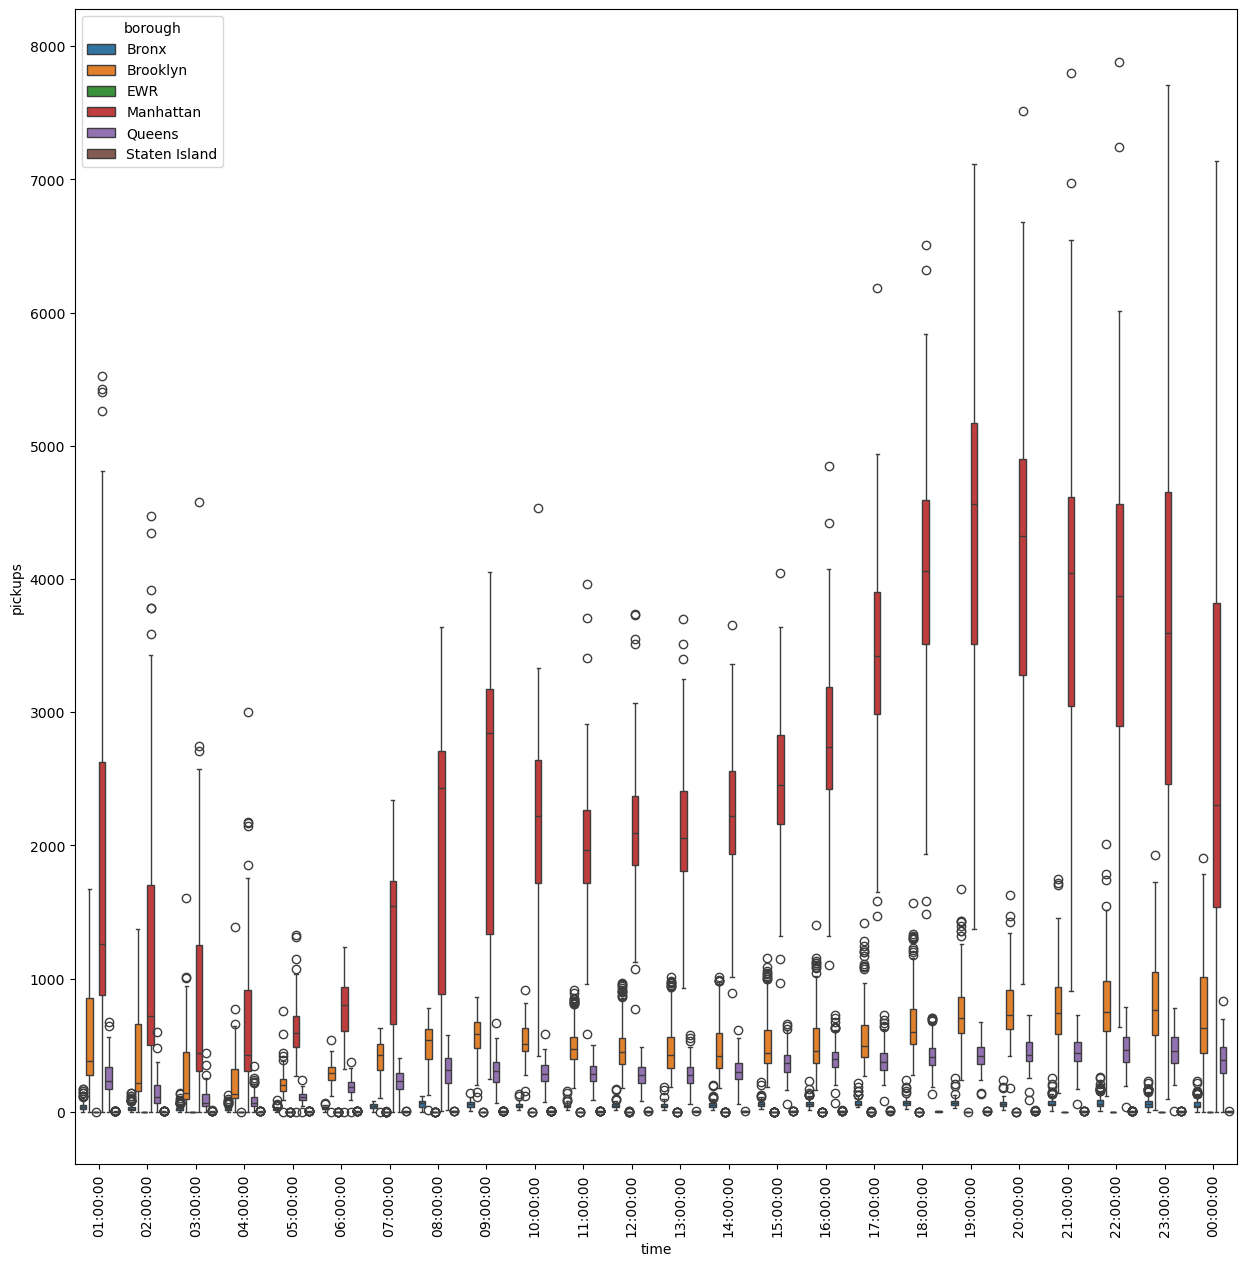

In [36]:
fig, axes = plt.subplots(figsize = (15, 15))
sns.boxplot(data = uber1, x = 'time', y = 'pickups', hue = 'borough')
plt.xticks(rotation = 90)
plt.show()